# Income Race 2020

In [1]:
# Dependencies
import requests
import pandas as pd
from census import Census
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2020
)

In [3]:
# Run Census Search to retrieve data on all states (2021 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B19013A_001E",
        "B19013B_001E",
        "B19013C_001E",
        "B19013D_001E",
        "B19013E_001E",
        "B19013F_001E",
        "B19013G_001E",
        "B19013I_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_race_2020 = pd.DataFrame(census_data)

# Column renaming
income_race_2020 = income_race_2020.rename(
    columns = {
        "B19013_001E": "Household Income Total",
        "B19013A_001E": "White Alone Householder",
        "B19013B_001E": "African American Alone Householder",
        "B19013C_001E": "American Indian and Alaska Native Alone Householder",
        "B19013D_001E": "Asian Alone Householder",
        "B19013E_001E": "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "B19013F_001E": "Some Other Race Alone Householder",
        "B19013G_001E": "Two or more Races Householder",
        "B19013I_001E": "Hispanic or Latino Householder",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_race_2020 = income_race_2020[
    [
        "Name",
        "Household Income Total",
        "White Alone Householder",
        "African American Alone Householder",
        "American Indian and Alaska Native Alone Householder",
        "Asian Alone Householder",
        "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "Some Other Race Alone Householder",
        "Two or more Races Householder",
        "Hispanic or Latino Householder"
    ]
]

# Rename name to state
income_race_2020 = income_race_2020.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_race_2020)}")
income_race_2020

Number of rows in the DataFrame: 52


,State,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Pennsylvania,63627.0,67270.0,40370.0,41937.0,80088.0,53609.0,40023.0,57857.0,45590.0
1,California,78672.0,82157.0,54976.0,60182.0,101380.0,81682.0,59287.0,76733.0,62330.0
2,West Virginia,48037.0,48670.0,32803.0,22557.0,55372.0,-666666666.0,44297.0,42143.0,53829.0
3,Utah,74197.0,76024.0,44772.0,49403.0,75343.0,66637.0,54362.0,70447.0,57417.0
4,New York,71117.0,79252.0,51060.0,44268.0,78925.0,46887.0,46500.0,64279.0,52643.0
5,District of Columbia,90842.0,144769.0,48515.0,53244.0,107732.0,130104.0,61145.0,96305.0,80502.0
6,Alaska,77790.0,85644.0,64054.0,49963.0,73873.0,66026.0,73172.0,72478.0,67559.0
7,Florida,57703.0,61065.0,43418.0,49775.0,73412.0,55856.0,48038.0,57003.0,52092.0
8,South Carolina,54864.0,63490.0,36271.0,42052.0,74108.0,64306.0,41369.0,53626.0,45778.0
9,North Dakota,65315.0,68419.0,39280.0,38129.0,55179.0,29141.0,45902.0,56133.0,46367.0


In [4]:
# Read in the housing listing prices to compare to income by race
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")
listing_prices

,Unnamed: 0,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


In [6]:
income_race = pd.merge(income_race_2020, listing_prices, on=('State'), how='right')

income_race = income_race[["State",
                         "Year_Month_2020",
                         "Median Listing Price_2020",
                         "Household Income Total",
                         "White Alone Householder",
                         "African American Alone Householder",
                         "American Indian and Alaska Native Alone Householder",
                         "Asian Alone Householder",
                         "Native Hawaiian and Other Pacific Isalnder Alone Householder",
                         "Some Other Race Alone Householder",
                         "Two or more Races Householder",
                         "Hispanic or Latino Householder"
                        ]]

income_race["Median Listing Price_2020"] = income_race["Median Listing Price_2020"].map("${:,.2f}".format)
income_race["Household Income Total"] = income_race["Household Income Total"].map("${:,.2f}".format)
income_race["White Alone Householder"] = income_race["White Alone Householder"].map("${:,.2f}".format)
income_race["African American Alone Householder"] = income_race["African American Alone Householder"].map("${:,.2f}".format)
income_race["American Indian and Alaska Native Alone Householder"] = income_race["American Indian and Alaska Native Alone Householder"].map("${:,.2f}".format)
income_race["Asian Alone Householder"] = income_race["Asian Alone Householder"].map("${:,.2f}".format)
income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"] = income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"].map("${:,.2f}".format)
income_race["Some Other Race Alone Householder"] = income_race["Some Other Race Alone Householder"].map("${:,.2f}".format)
income_race["Two or more Races Householder"] = income_race["Two or more Races Householder"].map("${:,.2f}".format)
income_race["Hispanic or Latino Householder"] = income_race["Hispanic or Latino Householder"].map("${:,.2f}".format)

income_race

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Pennsylvania,202012,"$259,900.00","$63,627.00","$67,270.00","$40,370.00","$41,937.00","$80,088.00","$53,609.00","$40,023.00","$57,857.00","$45,590.00"
1,Utah,202012,"$531,450.00","$74,197.00","$76,024.00","$44,772.00","$49,403.00","$75,343.00","$66,637.00","$54,362.00","$70,447.00","$57,417.00"
2,New York,202012,"$569,000.00","$71,117.00","$79,252.00","$51,060.00","$44,268.00","$78,925.00","$46,887.00","$46,500.00","$64,279.00","$52,643.00"
3,Colorado,202012,"$510,500.00","$75,231.00","$77,462.00","$53,806.00","$52,028.00","$83,168.00","$71,294.00","$55,011.00","$66,395.00","$57,790.00"
4,West Virginia,202012,"$165,000.00","$48,037.00","$48,670.00","$32,803.00","$22,557.00","$55,372.00","$-666,666,666.00","$44,297.00","$42,143.00","$53,829.00"
5,Florida,202012,"$342,250.00","$57,703.00","$61,065.00","$43,418.00","$49,775.00","$73,412.00","$55,856.00","$48,038.00","$57,003.00","$52,092.00"
6,Wyoming,202012,"$265,000.00","$65,304.00","$66,028.00","$53,354.00","$50,458.00","$69,917.00","$45,625.00","$59,587.00","$61,115.00","$56,981.00"
7,Minnesota,202012,"$299,650.00","$73,382.00","$76,380.00","$40,785.00","$37,795.00","$82,473.00","$55,938.00","$54,934.00","$61,836.00","$57,081.00"
8,Kansas,202012,"$195,125.00","$61,091.00","$63,379.00","$39,274.00","$43,540.00","$70,355.00","$46,269.00","$48,693.00","$50,953.00","$49,196.00"
9,Virginia,202012,"$344,995.00","$76,398.00","$81,840.00","$52,929.00","$67,730.00","$108,033.00","$74,432.00","$63,132.00","$78,872.00","$70,786.00"


In [7]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_race[income_race["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
2,New York,202012,"$569,000.00","$71,117.00","$79,252.00","$51,060.00","$44,268.00","$78,925.00","$46,887.00","$46,500.00","$64,279.00","$52,643.00"
5,Florida,202012,"$342,250.00","$57,703.00","$61,065.00","$43,418.00","$49,775.00","$73,412.00","$55,856.00","$48,038.00","$57,003.00","$52,092.00"
12,California,202012,"$704,450.00","$78,672.00","$82,157.00","$54,976.00","$60,182.00","$101,380.00","$81,682.00","$59,287.00","$76,733.00","$62,330.00"
20,Illinois,202012,"$259,450.00","$68,428.00","$74,204.00","$41,021.00","$55,222.00","$94,386.00","$60,096.00","$55,887.00","$62,567.00","$59,699.00"
34,Texas,202012,"$299,900.00","$63,826.00","$67,695.00","$48,293.00","$57,973.00","$91,879.00","$58,796.00","$48,208.00","$58,688.00","$51,401.00"


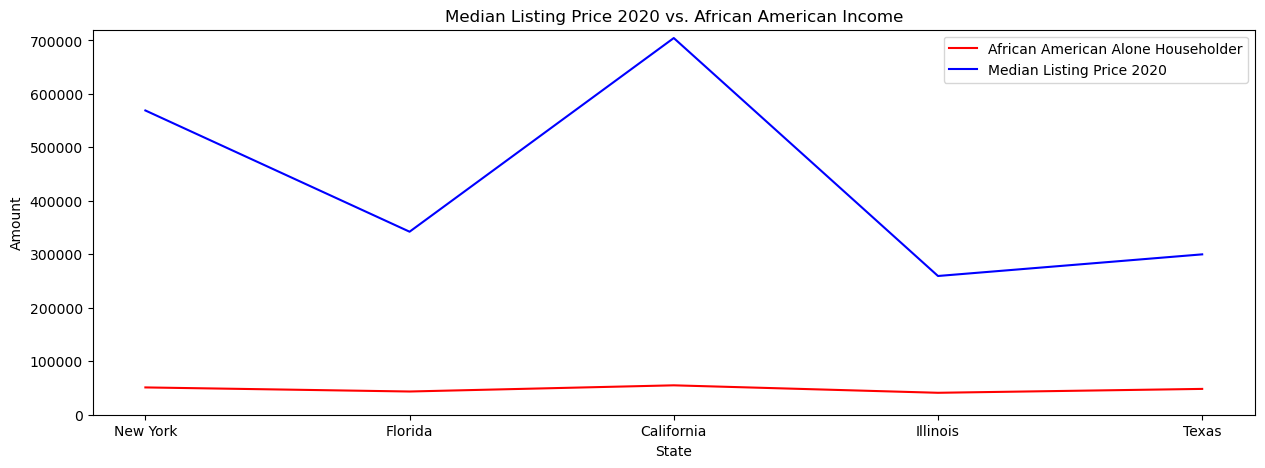

In [9]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["African American Alone Householder"] = selected_housing["African American Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="African American Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. African American Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig7.png")
plt.show()

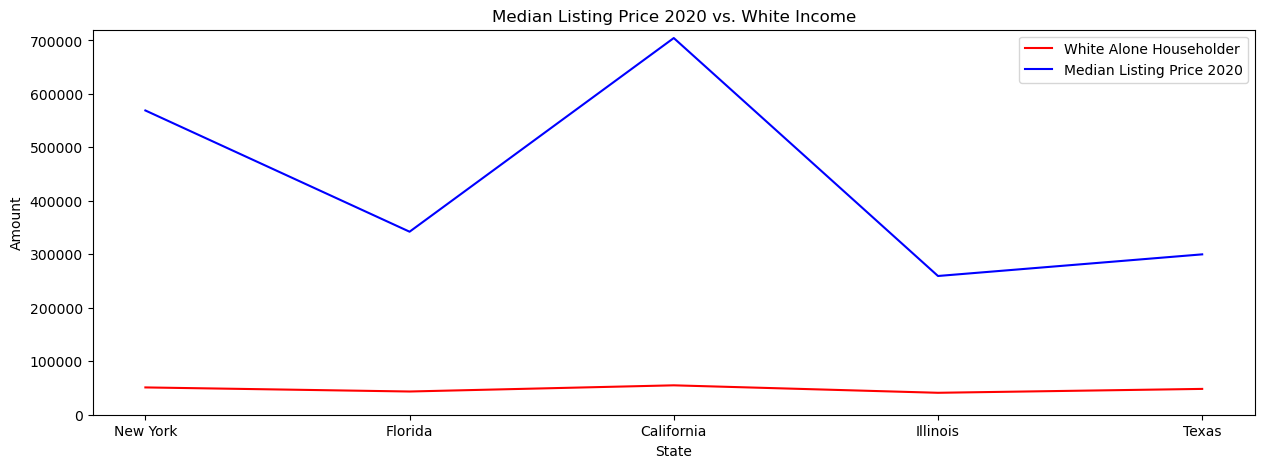

In [10]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["White Alone Householder"] = selected_housing["White Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="White Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. White Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig8.png")
plt.show()

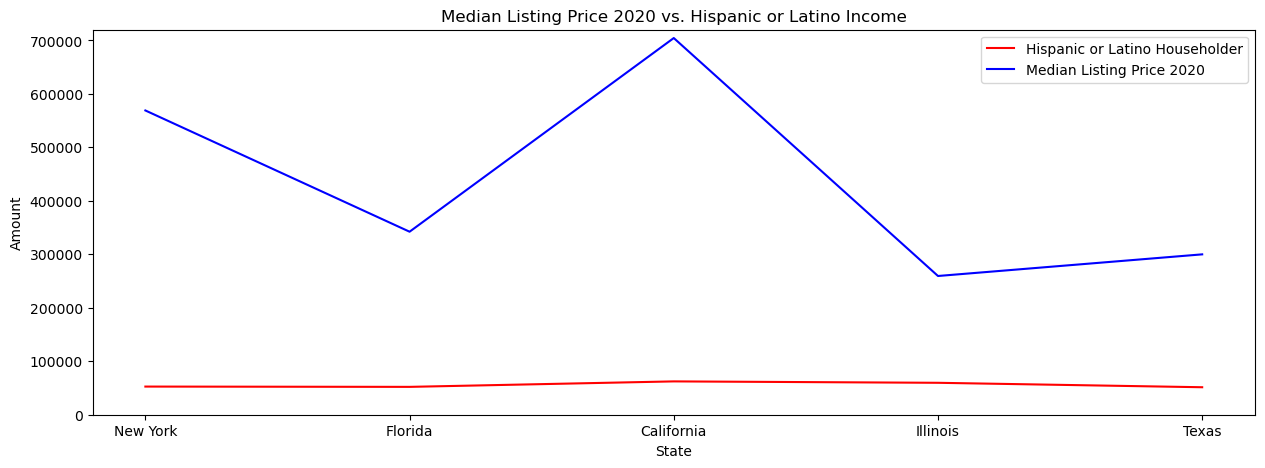

In [11]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["Hispanic or Latino Householder"] = selected_housing["Hispanic or Latino Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Hispanic or Latino Householder']
plt.plot(x_value2,y_value2, color="red", label="Hispanic or Latino Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. Hispanic or Latino Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig10.png")
plt.show()